In [123]:
import torch

In [124]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
x

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [125]:
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [126]:
x = x.unsqueeze(0)
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([1, 3, 3])
torch.Size([1, 3, 3])
3


In [127]:
x=x.squeeze(0)
print(x.size())
print(x.shape)
print(x.ndimension())

torch.Size([3, 3])
torch.Size([3, 3])
2


In [128]:
x.view(3,3,1)

tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])

## 3.1.2

In [129]:
w = torch.randn(5,3,dtype = torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print(w.size())
print(x.size())
print(w)
print(x)

torch.Size([5, 3])
torch.Size([3, 2])
tensor([[-0.4505, -0.9038, -0.3810],
        [ 0.4944, -2.4541,  0.6571],
        [ 1.9616,  1.1310, -0.0959],
        [-1.6511,  1.7521,  0.2354],
        [-1.6981,  0.2876,  0.0759]])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [130]:
b = torch.randn(5,2)


In [131]:
wx = w.mm(x)

In [132]:
result = b+wx
result

tensor([[-2.2533, -6.1626],
        [-2.7829, -5.9730],
        [ 4.6820,  6.9165],
        [ 6.9756,  5.1315],
        [ 0.4569, -0.5878]])

## 3.1.3 Autograd

In [133]:
w = torch.tensor(1.0,requires_grad=True)
a=w*3
print(a)
l = a**2
print(l)

tensor(3., grad_fn=<MulBackward0>)
tensor(9., grad_fn=<PowBackward0>)


In [134]:
l.backward()
print('l을w로 미분한 값',w.grad)

l을w로 미분한 값 tensor(18.)


# 3.2 경사하강법으로 이미지 복원

In [135]:
import torch
import pickle
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [136]:
broken_image = torch.FloatTensor(pickle.load(open('./broken_image_t.p','rb'),encoding='latin1'))
print(broken_image.size())
# plt.imshow(broken_image.view(100,100))

torch.Size([10000])


In [137]:
tf = transforms.ToPILImage()
img_t = tf(broken_image.view(100,100))
# img_t.show()

In [138]:
'''plt.imshow(broken_image.view(100,100))'''

'plt.imshow(broken_image.view(100,100))'

In [139]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [140]:
def distance_loss(hypothesis, broken_image):

    return torch.dist(hypothesis, broken_image)

In [141]:
random_tensor = torch.randn(10000,dtype=torch.float)

In [142]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_()
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis,broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i %1000==0:
        print(f'Los at {i} = {loss.item()}')

Los at 0 = 12.257941246032715
Los at 1000 = 1.1659899950027466
Los at 2000 = 0.5589990615844727
Los at 3000 = 0.38662388920783997
Los at 4000 = 0.30633383989334106
Los at 5000 = 0.2571209669113159
Los at 6000 = 0.22161762416362762
Los at 7000 = 0.19338810443878174
Los at 8000 = 0.16949154436588287
Los at 9000 = 0.14837421476840973
Los at 10000 = 0.12913742661476135
Los at 11000 = 0.11123240739107132
Los at 12000 = 0.09430614113807678
Los at 13000 = 0.07812308520078659
Los at 14000 = 0.06251861155033112
Los at 15000 = 0.047375623136758804
Los at 16000 = 0.03261047229170799
Los at 17000 = 0.02113400027155876
Los at 18000 = 0.02116466872394085
Los at 19000 = 0.02116718702018261


In [143]:
random_tensor.size()

torch.Size([10000])

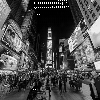

In [144]:
img = tf(random_tensor.view(100,100))
display(img)

In [145]:
'''plt.imshow(random_tensor.view(100,100).data)'''

'plt.imshow(random_tensor.view(100,100).data)'

# 3.3 신경망 모델 구현하기

In [146]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [147]:
n_dim =2
X_train, y_train = make_blobs(n_samples=80,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3)
X_test, y_test = make_blobs(n_samples=20,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3)

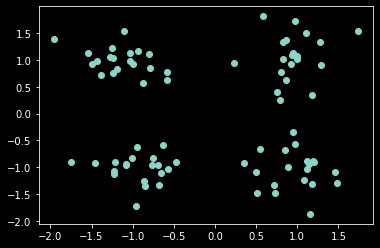

In [148]:
import pandas as pd
pd.DataFrame(X_train)
plt.scatter(X_train[:,0],X_train[:,1])

In [149]:
X_train.shape

(80, 2)

In [150]:
def label_map(y_,from_,to_):
    y=np.copy(y_)
    for f in from_:
        y[y_==f]=to_
    return y

In [151]:
y_train = label_map(y_train,[0,1],0)
y_train = label_map(y_train,[2,3],1)
y_test = label_map(y_test,[0,1],0)
y_test = label_map(y_test,[2,3],1)

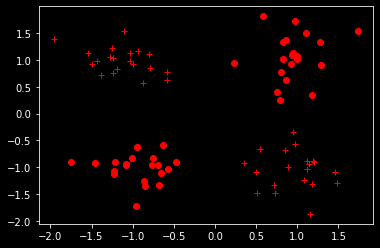

In [152]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(X_train, y_train, c='r')
plt.show()

In [153]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [154]:
class NeuralNet(torch.nn.Module):
    def __init__(self,input_size,hidden_size):
        super(NeuralNet,self).__init__()
        self.input_size =input_size
        self.hidden_size = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size,self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size,1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self,input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output
        
        

In [155]:
model = NeuralNet(2,5)
lr = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer =torch.optim.SGD(model.parameters(),lr =lr)


In [156]:
model.eval()
test_loss_before = criterion(model(X_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6991589665412903


In [157]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(X_train)
    train_loss =criterion(train_output.squeeze(),y_train)
    if epoch%100==0:
        print(f'Train loss at {epoch} is {train_loss.item()}')
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7030295133590698
Train loss at 100 is 0.6148730516433716
Train loss at 200 is 0.5351118445396423
Train loss at 300 is 0.4485740065574646
Train loss at 400 is 0.3624223470687866
Train loss at 500 is 0.290576308965683
Train loss at 600 is 0.23737075924873352
Train loss at 700 is 0.1987237185239792
Train loss at 800 is 0.16897718608379364
Train loss at 900 is 0.14605189859867096
Train loss at 1000 is 0.12836413085460663
Train loss at 1100 is 0.11388310045003891
Train loss at 1200 is 0.10184971243143082
Train loss at 1300 is 0.09196163713932037
Train loss at 1400 is 0.08359403908252716
Train loss at 1500 is 0.07630652189254761
Train loss at 1600 is 0.0699194073677063
Train loss at 1700 is 0.06418570876121521
Train loss at 1800 is 0.05892930552363396
Train loss at 1900 is 0.05410746484994888


In [158]:
model.eval()
criterion(torch.squeeze(model(X_test)),y_test)

tensor(0.0605, grad_fn=<BinaryCrossEntropyBackward0>)

In [159]:
model.state_dict()

OrderedDict([('linear_1.weight',
              tensor([[-2.0416, -1.0744],
                      [-1.2183,  1.4002],
                      [ 1.4934,  2.1074],
                      [-0.7996,  0.5597],
                      [ 0.5557, -0.5152]])),
             ('linear_1.bias',
              tensor([-0.1124,  0.0585, -0.2218, -0.3300, -0.4785])),
             ('linear_2.weight',
              tensor([[-2.1937,  1.7004, -2.5024,  0.6349,  0.3547]])),
             ('linear_2.bias', tensor([2.0598]))])